# Mini Project: Flask for ML Tasks

Flask is a micro web framework for Python that simplifies the process of building web applications. It's designed to be lightweight, flexible, and easy to use, making it a popular choice for developing web applications, APIs, and microservices. Flask doesn't impose a lot of constraints on how you structure your application, giving you the freedom to design your application as needed.

Here's how Flask works and how it can be used for machine learning engineering:

**1. Web Application Basics:**
Flask allows you to define routes (URLs) and associate them with Python functions. When a user visits a specific URL, the associated function is executed, and you can return HTML, JSON, images, or any other type of data as a response. This makes it great for building dynamic and interactive web applications.

**2. Integration with Machine Learning:**
Flask can be incredibly useful in the context of machine learning engineering for a variety of purposes:

- **Model Deployment:** Flask can be used to deploy machine learning models as APIs. Once your model is trained, you can create a Flask app that exposes the model through a web API. This enables other applications, platforms, or services to easily interact with and use your trained models for making predictions.

- **Data Visualization:** You can use Flask to create interactive visualizations of data and model predictions. This is particularly useful when you want to provide users with a graphical representation of your machine learning insights.

- **Custom Preprocessing:** If your machine learning model requires preprocessing steps before making predictions, Flask can be used to create an interface where users can input data, and your app preprocesses the data and feeds it to the model for prediction.

- **User Interface:** Flask can help you create user-friendly interfaces for your machine learning models, allowing non-technical users to interact with and utilize your models without writing code.

- **A/B Testing and Experimentation:** Flask apps can be used to deploy different versions of your models for A/B testing or experimentation, allowing you to compare the performance of different models and make data-driven decisions.

**3. Real-world Example:**
Imagine you've trained a sentiment analysis model, and you want to allow users to input text and get predictions about the sentiment of the text. You can create a Flask app that provides a simple web interface where users can type in their text, and the app sends the text to your sentiment analysis model and displays the result.

A typical Flask application follows a specific structure that helps organize your code, templates, static files, and other resources. This structure is designed to keep your codebase organized and maintainable as your application grows. The layout typically consists of several key components:

1. **Main Application File (`app.py` or similar):**
   This is the entry point of your Flask application. It contains the core configuration, route definitions, and application setup. You define the routes (URLs) your application will respond to, and associate each route with a Python function that handles the logic for that route.

2. **Templates Folder (`templates/`):**
   This folder contains your HTML templates. Flask uses a templating engine (Jinja2 by default) to generate dynamic HTML content. Templates allow you to separate the presentation (HTML) from the logic (Python) in your application, making your code more organized and maintainable. Templates can also include placeholders for dynamic data that Flask fills in when rendering the template.

3. **Static Folder (`static/`):**
   The `static` folder holds static assets like CSS files, JavaScript files, images, fonts, and other resources that are directly served to the user's browser. These assets are typically used to style and enhance the appearance of your web application. By separating static assets from dynamic content, you can optimize the performance of your application.

4. **Other Application Files and Modules:**
   Depending on the complexity of your application, you might create additional modules or packages to handle different aspects of your application, such as database interactions, machine learning model deployment, authentication, and more. These modules help keep your codebase modular and maintainable.

Here's a simplified example of the structure of a Flask application:

```
my_flask_app/
├── app.py
├── templates/
│   ├── index.html
│   ├── result.html
├── static/
│   ├── styles.css
│   ├── script.js
└── other_modules/
    ├── database.py
    ├── ml_model.py
```

In this example:

- `app.py` is the main application file where you define routes, configure the app, and handle requests.
- The `templates` folder contains HTML templates that define the structure of your web pages.
- The `static` folder holds static assets like CSS and JavaScript files.
- The `other_modules` folder might contain additional modules or packages for handling specific tasks, like interacting with a database (`database.py`) or deploying a machine learning model (`ml_model.py`).

The separation of static files and templates helps you maintain clean and organized code. Static assets are served directly to users, while templates are used to dynamically generate HTML pages. This structure facilitates collaboration among team members and makes it easier to understand, maintain, and extend your Flask application.

In this mini-project you'll be introduced to Flask by developing an application where your render a bar plot based on user-input data through an API. Note, colab is not a natural place for API development. Colab is mainly used here to be consistent with other mini-projects.

As such, we'll need to leverage a tool called [ngrok](https://ngrok.com/). Ngrok is a tool that allows you to create secure tunnels from a public endpoint to a locally running web service or application. It enables you to expose your local server to the internet, making it accessible to others even if it's running on your own computer behind firewalls or NAT (Network Address Translation) devices. In this mini-project, we'll use ngrok to expose your colab instance to the wider internet. Again, you'd never use something like this for production.

Go ahead and sign up for an ngrok account [here](https://ngrok.com/). It's free and useful for a wide variety of tasks.

In [1]:
!pip install pyngrok
!pip install flask

Execute the cell below to authenticate to ngrok. Paste your authentication token after copying it from [https://dashboard.ngrok.com/auth](https://dashboard.ngrok.com/auth). This assumes you've already created an ngrok account.  

In [2]:
import getpass
from pyngrok import ngrok, conf

print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth


Time to create our Flask application. Here are your tasks:

1. In your colab notebook create a new folder named `static`. In the folder create a file called `styles.css` and populate it with the following code:
```css
.chart-container {
    width: 80%;
    margin: 20px auto;
}
```
This creates parameters for the bar chart we'll be creating. Note, the full directory of the file should be `/content/static/styles.css`.
2. Create another folder named `templates`. Create a file called `index.html` and populate it with the following html code:
```html
<!DOCTYPE html>
<html>
<head>
    <title>Data Visualization with Flask</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='styles.css') }}">
</head>
<body>
    <h1>Data Visualization with Flask</h1>
    <form method="POST" action="/">
        <div>
            <label for="categories">Categories (comma-separated):</label>
            <input type="text" name="categories" required>
        </div>
        <div>
            <label for="values">Values (comma-separated):</label>
            <input type="text" name="values" required>
        </div>
        <button type="submit">Generate Bar Chart</button>
    </form>
    <div class="chart-container">
        {% if chart_url %}
            <img src="data:image/png;base64,{{ chart_url }}" alt="Bar Chart">
        {% endif %}
    </div>
</body>
</html>
```
Html is a pretty intuitive language to understand. Go through each line and make sure you understand what's happening. An extremely useful skill for an engineer is to be able to *understand* any kind of code, even if the engineer doesn't fully know how to write in the language.

1. Write a function called `generate_bar_chart` that takes a list of category names and respective values and generates a bar chart using [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). In the function, return your barplot as a UTF-8 encoded string. It may be useful to create a BytesIO object using [io.BytesIO](https://docs.python.org/3/library/io.html#io.BytesIO) to store the barplot and then [base64.b64encode](https://docs.python.org/3/library/base64.html#base64.b64encode) to create the encoding.
2. Now, you'll be filling in the `index` function that serves as the landing page for our application. If you're not too familiar with how HTTP works, read this quick primer [here](https://jaimelightfoot.com/blog/how-http-works/). From the form defined in `index.html`, extract the input for the `categories` field and store it in a list. Also, extract the input for the `values` field and store it in a list as well.
3. Pass the two lists from the previous step to your function `generate_bar_chart`.
4. The output of `generate_bar_chart` in the index function should then be passed to Flask's [render_template](https://flask.palletsprojects.com/en/2.3.x/api/#flask.render_template) and returned by the function.
5. Execute the cell below with your code and click on the link output by "ngrok tunnel". This is the application landing page. See if everything works.
6. Have fun with the application built here. See if you can extend it in some way. Make sure you understand how the python code interacts with the html template.

**If you rerun the cell below and get a port issue, go ahead and restart the colab runtime environment and try again.**

In [3]:
# link to tutorial that explains what's going on : https://www.geeksforgeeks.org/retrieving-html-from-data-using-flask/#

from flask import Flask, render_template, request
import threading
import matplotlib.pyplot as plt
import io
import os
import base64

os.environ["FLASK_DEBUG"] = "development"

app = Flask(__name__, template_folder='./templates', static_folder='./static')
app.Debug = True
app.config["EXPLAIN_TEMPLATE_LOADING"] = True # get more debug output
port = 5000

# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))

# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url

def generate_bar_chart(categories, values):
    # Write code here for a function that takes a list of category names and
    # respective values and generates a bar chart using plt.bar. Return your
    # barplot as a UTF-8 encoded string.
    # found a Py3 tutorial here: https://stackoverflow.com/questions/38061267/matplotlib-graphic-image-to-base64/63381737
    plt.bar(categories, values)
    plt.tight_layout()
    iob = io.BytesIO()
    plt.savefig(iob, format='png')
    iob.seek(0)
    mime_type = "image/png"  # same as the plt.savefig() function above
    base64_enc = base64.b64encode(iob.read()).decode('utf-8') # decode converts binary data back to text for the browser
    base64_pic = f"data:{mime_type};base64,{base64_enc}"
    return base64_pic

@app.route('/', methods=['GET', 'POST'])
def index():
    chart_url = None

    if request.method == 'POST':
        # Extract categories from the request form and convert the string to a
        # list.
        categories = request.form.get("categories")
        cat_list = list(map(str.strip, categories.split(",")))  # split by comma and strip whitespace

        # Extract values from the request form and convert the input string to a
        # list of integers.
        values = request.form.get("values")
        val_strings = list(map(str.strip, values.split(","))) # split by comma and strip whitespace
        val_list = [float(i) for i in val_strings] # convert to numbers

        # Pass your categories and values to the generate_bar_chart function.
        chart_url = generate_bar_chart(cat_list, val_list)
        chart_url = chart_url

    # Return a render_template function, passing your bar plot as input.
    return render_template("index.html", chart_url=chart_url)

if __name__ == '__main__':
    # Start the Flask server in a new thread
  threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()

 * ngrok tunnel "https://9324-107-146-232-5.ngrok-free.app" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: on


In [4]:
# test input
# money, debit, credit
# 654, 2300, 4900
# shows the image below:
im = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAoTElEQVR4nO3df1TVdYL/8dcV5YLCvSQh6Ijp5KQwqaWW3H6ZEyPjYidXPZvlqhk0R0M3pZR1x1Wm2kNrM6VtmU3uiLObJ/U01SqpuZg0m/iLGQodf0xGAy0C9gOuuHoReH//6MvndNPM5CrB+/k4557j/Xze933fH8+nztMP935wGWOMAAAAYI0u7b0AAAAAXFkEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAs07W9F3AltbS0qKqqStHR0XK5XO29HAAAgEtijNHJkyfVp08fdeny3a/nWRWAVVVVSkxMbO9lAAAAhERlZaX69u37nV9nVQBGR0dL+vIvy+PxtPNqAAAALo3f71diYqLTNt+VVQHY+mNfj8dDAAIAgA7vUj/SxpdAAAAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDJtDsDc3Fy5XK6gx+DBg539Z86cUVZWlmJjYxUVFaVJkyappqYmaI6Kigqlp6ere/fu6tWrlxYsWKCmpqagMTt37tTw4cPldrs1cOBA5efnt3XpAAAAVgrJFcAf//jHOn78uPP4n//5H2ff/PnztWnTJm3cuFFFRUWqqqrSxIkTnf3Nzc1KT09XY2Ojdu3apbVr1yo/P19LlixxxpSXlys9PV1jxoxRaWmp5s2bp8zMTG3bti0UywcAALCKyxhj2jJBbm6u3njjDZWWlp6zr76+XnFxcVq3bp0mT54sSTp8+LCSkpJUXFyslJQUbdmyRePHj1dVVZXi4+MlSatWrVJOTo5OnDih8PBw5eTkqKCgQAcOHHDmnjJliurq6rR169aLXqvf75fX61V9fT33AQQAAB1WW5smJFcA//KXv6hPnz764Q9/qKlTp6qiokKSVFJSorNnzyo1NdUZO3jwYPXr10/FxcWSpOLiYg0ZMsSJP0lKS0uT3+/XwYMHnTFfnaN1TOsc3yQQCMjv9wc9AAAAbNfmABw1apTy8/O1detWvfjiiyovL9ftt9+ukydPqrq6WuHh4YqJiQl6TXx8vKqrqyVJ1dXVQfHXur9134XG+P1+nT59+hvXlpeXJ6/X6zz4PcAAAAAh+FVw48aNc/48dOhQjRo1Stdcc402bNigyMjItk7fJosWLVJ2drbzvPX35gEAANgs5LeBiYmJ0XXXXacPP/xQCQkJamxsVF1dXdCYmpoaJSQkSJISEhLO+VZw6/NvG+PxeC4YmW632/m9v/z+XwAAgC+FPAAbGhp07Ngx9e7dWyNGjFC3bt1UWFjo7D9y5IgqKirk8/kkST6fT2VlZaqtrXXGbN++XR6PR8nJyc6Yr87ROqZ1DgAAAFy8NgfgY489pqKiIn388cfatWuX/vZv/1ZhYWG677775PV6lZGRoezsbL3zzjsqKSnRzJkz5fP5lJKSIkkaO3askpOTNW3aNL3//vvatm2bFi9erKysLLndbknSrFmz9NFHH2nhwoU6fPiwVq5cqQ0bNmj+/PltXT4AAIB12vwZwE8++UT33XefPvvsM8XFxem2227T7t27FRcXJ0l69tln1aVLF02aNEmBQEBpaWlauXKl8/qwsDBt3rxZs2fPls/nU48ePTRjxgw9/vjjzpgBAwaooKBA8+fP14oVK9S3b1+tXr1aaWlpbV0+AACAddp8H8COhPsAAgCAzuB7cR9AAAAAdBxt/hEwAACdRq63vVeAziC3vr1X8K24AggAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYJeQA+9dRTcrlcmjdvnrPtzJkzysrKUmxsrKKiojRp0iTV1NQEva6iokLp6enq3r27evXqpQULFqipqSlozM6dOzV8+HC53W4NHDhQ+fn5oV4+AABApxfSANy3b59eeuklDR06NGj7/PnztWnTJm3cuFFFRUWqqqrSxIkTnf3Nzc1KT09XY2Ojdu3apbVr1yo/P19LlixxxpSXlys9PV1jxoxRaWmp5s2bp8zMTG3bti2UhwAAANDpuYwxJhQTNTQ0aPjw4Vq5cqWefPJJ3XDDDVq+fLnq6+sVFxendevWafLkyZKkw4cPKykpScXFxUpJSdGWLVs0fvx4VVVVKT4+XpK0atUq5eTk6MSJEwoPD1dOTo4KCgp04MAB5z2nTJmiuro6bd269aLW6Pf75fV6VV9fL4/HE4rDBgB0Jrne9l4BOoPc+sv+Fm1tmpBdAczKylJ6erpSU1ODtpeUlOjs2bNB2wcPHqx+/fqpuLhYklRcXKwhQ4Y48SdJaWlp8vv9OnjwoDPm63OnpaU5cwAAAODidA3FJK+++qr++Mc/at++fefsq66uVnh4uGJiYoK2x8fHq7q62hnz1fhr3d+670Jj/H6/Tp8+rcjIyHPeOxAIKBAIOM/9fv93PzgAAIBOps1XACsrK/XII4/olVdeUURERCjWFDJ5eXnyer3OIzExsb2XBAAA0O7aHIAlJSWqra3V8OHD1bVrV3Xt2lVFRUV67rnn1LVrV8XHx6uxsVF1dXVBr6upqVFCQoIkKSEh4ZxvBbc+/7YxHo/nvFf/JGnRokWqr693HpWVlW09XAAAgA6vzQF41113qaysTKWlpc5j5MiRmjp1qvPnbt26qbCw0HnNkSNHVFFRIZ/PJ0ny+XwqKytTbW2tM2b79u3yeDxKTk52xnx1jtYxrXOcj9vtlsfjCXoAAADYrs2fAYyOjtb1118ftK1Hjx6KjY11tmdkZCg7O1s9e/aUx+PR3Llz5fP5lJKSIkkaO3askpOTNW3aNC1btkzV1dVavHixsrKy5Ha7JUmzZs3S888/r4ULF+rBBx/Ujh07tGHDBhUUFLT1EAAAAKwSki+BfJtnn31WXbp00aRJkxQIBJSWlqaVK1c6+8PCwrR582bNnj1bPp9PPXr00IwZM/T44487YwYMGKCCggLNnz9fK1asUN++fbV69WqlpaVdiUMAAADoNEJ2H8COgPsAAgAuiPsAIhRsug8gAAAAOgYCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsEybA/DFF1/U0KFD5fF45PF45PP5tGXLFmf/mTNnlJWVpdjYWEVFRWnSpEmqqakJmqOiokLp6enq3r27evXqpQULFqipqSlozM6dOzV8+HC53W4NHDhQ+fn5bV06AACAldocgH379tVTTz2lkpIS7d+/Xz/5yU90zz336ODBg5Kk+fPna9OmTdq4caOKiopUVVWliRMnOq9vbm5Wenq6GhsbtWvXLq1du1b5+flasmSJM6a8vFzp6ekaM2aMSktLNW/ePGVmZmrbtm1tXT4AAIB1XMYYE+pJe/bsqaefflqTJ09WXFyc1q1bp8mTJ0uSDh8+rKSkJBUXFyslJUVbtmzR+PHjVVVVpfj4eEnSqlWrlJOToxMnTig8PFw5OTkqKCjQgQMHnPeYMmWK6urqtHXr1otel9/vl9frVX19vTweT2gPGgDQ8eV623sF6Axy6y/7W7S1aUL6GcDm5ma9+uqrOnXqlHw+n0pKSnT27FmlpqY6YwYPHqx+/fqpuLhYklRcXKwhQ4Y48SdJaWlp8vv9zlXE4uLioDlax7TOAQAAgIvXNRSTlJWVyefz6cyZM4qKitLrr7+u5ORklZaWKjw8XDExMUHj4+PjVV1dLUmqrq4Oir/W/a37LjTG7/fr9OnTioyMPO+6AoGAAoGA89zv97fpOAEAADqDkFwBHDRokEpLS7Vnzx7Nnj1bM2bM0J///OdQTN0meXl58nq9ziMxMbG9lwQAANDuQhKA4eHhGjhwoEaMGKG8vDwNGzZMK1asUEJCghobG1VXVxc0vqamRgkJCZKkhISEc74V3Pr828Z4PJ5vvPonSYsWLVJ9fb3zqKysbOuhAgAAdHiX5T6ALS0tCgQCGjFihLp166bCwkJn35EjR1RRUSGfzydJ8vl8KisrU21trTNm+/bt8ng8Sk5OdsZ8dY7WMa1zfBO32+3cnqb1AQAAYLs2fwZw0aJFGjdunPr166eTJ09q3bp12rlzp7Zt2yav16uMjAxlZ2erZ8+e8ng8mjt3rnw+n1JSUiRJY8eOVXJysqZNm6Zly5apurpaixcvVlZWltxutyRp1qxZev7557Vw4UI9+OCD2rFjhzZs2KCCgoK2Lh8AAMA6bQ7A2tpaTZ8+XcePH5fX69XQoUO1bds2/fSnP5UkPfvss+rSpYsmTZqkQCCgtLQ0rVy50nl9WFiYNm/erNmzZ8vn86lHjx6aMWOGHn/8cWfMgAEDVFBQoPnz52vFihXq27evVq9erbS0tLYuHwAAwDqX5T6A31fcBxAAcEHcBxChYNt9AAEAAPD9RwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgma7tvQAAHUyut71XgM4it769VwBYiyuAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYps0BmJeXp5tuuknR0dHq1auXJkyYoCNHjgSNOXPmjLKyshQbG6uoqChNmjRJNTU1QWMqKiqUnp6u7t27q1evXlqwYIGampqCxuzcuVPDhw+X2+3WwIEDlZ+f39blAwAAWKfNAVhUVKSsrCzt3r1b27dv19mzZzV27FidOnXKGTN//nxt2rRJGzduVFFRkaqqqjRx4kRnf3Nzs9LT09XY2Khdu3Zp7dq1ys/P15IlS5wx5eXlSk9P15gxY1RaWqp58+YpMzNT27Zta+shAAAAWMVljDGhnPDEiRPq1auXioqKdMcdd6i+vl5xcXFat26dJk+eLEk6fPiwkpKSVFxcrJSUFG3ZskXjx49XVVWV4uPjJUmrVq1STk6OTpw4ofDwcOXk5KigoEAHDhxw3mvKlCmqq6vT1q1bL2ptfr9fXq9X9fX18ng8oTxswB653vZeATqL3Pr2XsG5OL8RClfg3G5r04T8M4D19V8edM+ePSVJJSUlOnv2rFJTU50xgwcPVr9+/VRcXCxJKi4u1pAhQ5z4k6S0tDT5/X4dPHjQGfPVOVrHtM4BAACAi9M1lJO1tLRo3rx5uvXWW3X99ddLkqqrqxUeHq6YmJigsfHx8aqurnbGfDX+Wve37rvQGL/fr9OnTysyMvKc9QQCAQUCAee53+9v2wECAAB0AiG9ApiVlaUDBw7o1VdfDeW0lywvL09er9d5JCYmtveSAAAA2l3IAnDOnDnavHmz3nnnHfXt29fZnpCQoMbGRtXV1QWNr6mpUUJCgjPm698Kbn3+bWM8Hs95r/5J0qJFi1RfX+88Kisr23SMAAAAnUGbA9AYozlz5uj111/Xjh07NGDAgKD9I0aMULdu3VRYWOhsO3LkiCoqKuTz+SRJPp9PZWVlqq2tdcZs375dHo9HycnJzpivztE6pnWO83G73fJ4PEEPAAAA27X5M4BZWVlat26d3nzzTUVHRzuf2fN6vYqMjJTX61VGRoays7PVs2dPeTwezZ07Vz6fTykpKZKksWPHKjk5WdOmTdOyZctUXV2txYsXKysrS263W5I0a9YsPf/881q4cKEefPBB7dixQxs2bFBBQUFbDwEAAMAqbb4C+OKLL6q+vl533nmnevfu7TzWr1/vjHn22Wc1fvx4TZo0SXfccYcSEhL0+9//3tkfFhamzZs3KywsTD6fT3//93+v6dOn6/HHH3fGDBgwQAUFBdq+fbuGDRumX//611q9erXS0tLaeggAAABWCfl9AL/PuA8gEALcJw2hwn0A0VnZeB9AAAAAfL8RgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGVCEoDvvvuu7r77bvXp00cul0tvvPFG0H5jjJYsWaLevXsrMjJSqamp+stf/hI05vPPP9fUqVPl8XgUExOjjIwMNTQ0BI354IMPdPvttysiIkKJiYlatmxZKJYPAABglZAE4KlTpzRs2DC98MIL592/bNkyPffcc1q1apX27NmjHj16KC0tTWfOnHHGTJ06VQcPHtT27du1efNmvfvuu/r5z3/u7Pf7/Ro7dqyuueYalZSU6Omnn1Zubq5+85vfhOIQAAAArNE1FJOMGzdO48aNO+8+Y4yWL1+uxYsX65577pEk/e53v1N8fLzeeOMNTZkyRYcOHdLWrVu1b98+jRw5UpL0b//2b/qbv/kb/epXv1KfPn30yiuvqLGxUb/97W8VHh6uH//4xyotLdUzzzwTFIoAAAC4sMv+GcDy8nJVV1crNTXV2eb1ejVq1CgVFxdLkoqLixUTE+PEnySlpqaqS5cu2rNnjzPmjjvuUHh4uDMmLS1NR44c0RdffHHe9w4EAvL7/UEPAAAA2132AKyurpYkxcfHB22Pj4939lVXV6tXr15B+7t27aqePXsGjTnfHF99j6/Ly8uT1+t1HomJiW0/IAAAgA6uU38LeNGiRaqvr3celZWV7b0kAACAdnfZAzAhIUGSVFNTE7S9pqbG2ZeQkKDa2tqg/U1NTfr888+Dxpxvjq++x9e53W55PJ6gBwAAgO0uewAOGDBACQkJKiwsdLb5/X7t2bNHPp9PkuTz+VRXV6eSkhJnzI4dO9TS0qJRo0Y5Y959912dPXvWGbN9+3YNGjRIV1111eU+DAAAgE4jJAHY0NCg0tJSlZaWSvryix+lpaWqqKiQy+XSvHnz9OSTT+q//uu/VFZWpunTp6tPnz6aMGGCJCkpKUk/+9nP9NBDD2nv3r167733NGfOHE2ZMkV9+vSRJN1///0KDw9XRkaGDh48qPXr12vFihXKzs4OxSEAAABYIyS3gdm/f7/GjBnjPG+NshkzZig/P18LFy7UqVOn9POf/1x1dXW67bbbtHXrVkVERDiveeWVVzRnzhzddddd6tKliyZNmqTnnnvO2e/1evX2228rKytLI0aM0NVXX60lS5ZwCxgAAIDvyGWMMe29iCvF7/fL6/Wqvr6ezwMClyrX294rQGeRW9/eKzgX5zdC4Qqc221tmk79LWAAAACciwAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLdG3vBXRaud72XgE6g9z69l4BAKAT4gogAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAyxCAAAAAliEAAQAALEMAAgAAWIYABAAAsAwBCAAAYBkCEAAAwDIEIAAAgGUIQAAAAMsQgAAAAJYhAAEAACxDAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZTpcAL7wwgvq37+/IiIiNGrUKO3du7e9lwQAANChdKgAXL9+vbKzs7V06VL98Y9/1LBhw5SWlqba2tr2XhoAAECH0aEC8JlnntFDDz2kmTNnKjk5WatWrVL37t3129/+tr2XBgAA0GF0be8FXKzGxkaVlJRo0aJFzrYuXbooNTVVxcXF531NIBBQIBBwntfX10uS/H7/5V2sJAXM5X8PdH5X4lz9rji3ESqc3+isrsC53doyxlzaOdthAvDTTz9Vc3Oz4uPjg7bHx8fr8OHD531NXl6efvnLX56zPTEx8bKsEQi5p7ztvQLg8uH8Rmd1Bc/tkydPyuv97u/XYQLwUixatEjZ2dnO85aWFn3++eeKjY2Vy+Vqx5XB7/crMTFRlZWV8ng87b0cIGQ4t9GZcX5/fxhjdPLkSfXp0+eSXt9hAvDqq69WWFiYampqgrbX1NQoISHhvK9xu91yu91B22JiYi7XEnEJPB4P/xNBp8S5jc6M8/v74VKu/LXqMF8CCQ8P14gRI1RYWOhsa2lpUWFhoXw+XzuuDAAAoGPpMFcAJSk7O1szZszQyJEjdfPNN2v58uU6deqUZs6c2d5LAwAA6DA6VADee++9OnHihJYsWaLq6mrdcMMN2rp16zlfDMH3n9vt1tKlS8/5ET3Q0XFuozPj/O48XOZSvz8MAACADqnDfAYQAAAAoUEAAgAAWIYABAAAsAwBCAAX4c4779S8efMuamx+fv633nM0NzdXN9xwQ5vXBXyffPzxx3K5XCotLZUk7dy5Uy6XS3V1de26LpyLAASAdvDYY48F3df0gQce0IQJE9pvQcBlcMstt+j48ePODYsv5h9HuDI61G1gAKCziIqKUlRUVHsvAzivs2fPqlu3bm2eJzw8/Bt/WxfaF1cAcUF33nmn5s6dq3nz5umqq65SfHy8Xn75ZecG3NHR0Ro4cKC2bNnivKaoqEg333yz3G63evfurX/8x39UU1NT0Jz/8A//oIULF6pnz55KSEhQbm5u0PvW1dUpMzNTcXFx8ng8+slPfqL3339f0pc/YujSpYv2798f9Jrly5frmmuuUUtLy+X7C4EVTp06penTpysqKkq9e/fWr3/966D9gUBAjz32mH7wgx+oR48eGjVqlHbu3HnOPG+88YZ+9KMfKSIiQmlpaaqsrHT2ffVHwLm5uVq7dq3efPNNuVwuuVyu884HtEVLS4uWLVumgQMHyu12q1+/fvqXf/kX58e269ev1+jRoxUREaFXXnlFkrR69WolJSUpIiJCgwcP1sqVK4Pm3Lt3r2688UZFRERo5MiR+tOf/hS0/6s/At65c6dmzpyp+vp65zz/+v/7cQUZ4AJGjx5toqOjzRNPPGGOHj1qnnjiCRMWFmbGjRtnfvOb35ijR4+a2bNnm9jYWHPq1CnzySefmO7du5uHH37YHDp0yLz++uvm6quvNkuXLg2a0+PxmNzcXHP06FGzdu1a43K5zNtvv+2MSU1NNXfffbfZt2+fOXr0qHn00UdNbGys+eyzz4wxxvz0pz81Dz/8cNBahw4dapYsWXJF/l7Quc2ePdv069fP/Pd//7f54IMPzPjx4010dLR55JFHjDHGZGZmmltuucW8++675sMPPzRPP/20cbvd5ujRo8YYY9asWWO6detmRo4caXbt2mX2799vbr75ZnPLLbc477F06VIzbNgwY4wxJ0+eNH/3d39nfvazn5njx4+b48ePm0AgcKUPG53cwoULzVVXXWXy8/PNhx9+aP7whz+Yl19+2ZSXlxtJpn///ua1114zH330kamqqjL/+Z//aXr37u1se+2110zPnj1Nfn6+MebL8zYuLs7cf//95sCBA2bTpk3mhz/8oZFk/vSnPxljjHnnnXeMJPPFF1+YQCBgli9fbjwej3Oenzx5sh3/RuxGAOKCRo8ebW677TbneVNTk+nRo4eZNm2as+348eNGkikuLjb/9E//ZAYNGmRaWlqc/S+88IKJiooyzc3N553TGGNuuukmk5OTY4wx5g9/+IPxeDzmzJkzQWOuvfZa89JLLxljjFm/fr256qqrnDElJSXG5XKZ8vLy0B08rHTy5EkTHh5uNmzY4Gz77LPPTGRkpHnkkUfMX//6VxMWFmb+93//N+h1d911l1m0aJEx5ssAlGR2797t7D906JCRZPbs2WOMCQ5AY4yZMWOGueeeey7fgcFqfr/fuN1u8/LLL5+zrzUAly9fHrT92muvNevWrQva9sQTTxifz2eMMeall14ysbGx5vTp087+F1988RsD0Jgv/9vwer2hOzBcMn4EjG81dOhQ589hYWGKjY3VkCFDnG2tv4qvtrZWhw4dks/nk8vlcvbfeuutamho0CeffHLeOSWpd+/eqq2tlSS9//77amhoUGxsrPM5qaioKJWXl+vYsWOSpAkTJigsLEyvv/66pC8/WDxmzBj1798/tAcP6xw7dkyNjY0aNWqUs61nz54aNGiQJKmsrEzNzc267rrrgs7PoqIi5/yUpK5du+qmm25yng8ePFgxMTE6dOjQlTsY4P87dOiQAoGA7rrrrm8cM3LkSOfPp06d0rFjx5SRkRF0nj/55JPOeX7o0CENHTpUERERzut8Pt/lOwiEFF8Cwbf6+geBXS5X0LbW2Psun70735ytr29oaFDv3r3P+xmo1m+PhYeHa/r06VqzZo0mTpyodevWacWKFRf9/sClamhoUFhYmEpKShQWFha0jy914PsqMjLyW8f06NHD+XNDQ4Mk6eWXXw76x5Ckc857dEwEIEIqKSlJr732mowxThi+9957io6OVt++fS9qjuHDh6u6ulpdu3a94BW9zMxMXX/99Vq5cqWampo0ceLEUBwCLHfttdeqW7du2rNnj/r16ydJ+uKLL3T06FGNHj1aN954o5qbm1VbW6vbb7/9G+dpamrS/v37dfPNN0uSjhw5orq6OiUlJZ13fHh4uJqbm0N/QICkH/3oR4qMjFRhYaEyMzO/dXx8fLz69Omjjz76SFOnTj3vmKSkJP3Hf/yHzpw541wF3L179wXn5Tz//uBHwAiphx9+WJWVlZo7d64OHz6sN998U0uXLlV2dra6dLm40y01NVU+n08TJkzQ22+/rY8//li7du3SL37xi6Bv/iYlJSklJUU5OTm67777LupfuMC3iYqKUkZGhhYsWKAdO3bowIEDeuCBB5zz97rrrtPUqVM1ffp0/f73v1d5ebn27t2rvLw8FRQUOPN069ZNc+fO1Z49e1RSUqIHHnhAKSkpThB+Xf/+/fXBBx/oyJEj+vTTT3X27NkrcrywQ0REhHJycrRw4UL97ne/07Fjx7R79279+7//+ze+5pe//KXy8vL03HPP6ejRoyorK9OaNWv0zDPPSJLuv/9+uVwuPfTQQ/rzn/+st956S7/61a8uuI7+/furoaFBhYWF+vTTT/V///d/IT1OXDwCECH1gx/8QG+99Zb27t2rYcOGadasWcrIyNDixYsveg6Xy6W33npLd9xxh2bOnKnrrrtOU6ZM0V//+lfn84atMjIy1NjYqAcffDDUhwKLPf3007r99tt19913KzU1VbfddptGjBjh7F+zZo2mT5+uRx99VIMGDdKECRO0b98+54qhJHXv3l05OTm6//77deuttyoqKkrr16//xvd86KGHNGjQII0cOVJxcXF67733Lusxwj7//M//rEcffVRLlixRUlKS7r33Xuez1+eTmZmp1atXa82aNRoyZIhGjx6t/Px8DRgwQNKX/1jatGmTysrKdOONN+oXv/iF/vVf//WCa7jllls0a9Ys3XvvvYqLi9OyZctCeoy4eC5jjGnvRQCX6oknntDGjRv1wQcftPdSAADoMLgCiA6poaFBBw4c0PPPP6+5c+e293IAAOhQCEB0SHPmzNGIESN055138uNfAAC+I34EDAAAYBmuAAIAAFiGAAQAALAMAQgAAGAZAhAAAMAyBCAAAIBlCEAAAADLEIAAAACWIQABAAAsQwACAABYhgAEAACwDAEIAABgGQIQAADAMgQgAACAZQhAAAAAy/w/UXfINmN/pxgAAAAASUVORK5CYII="
# display.HTML(f"<img src='{im}'/>")

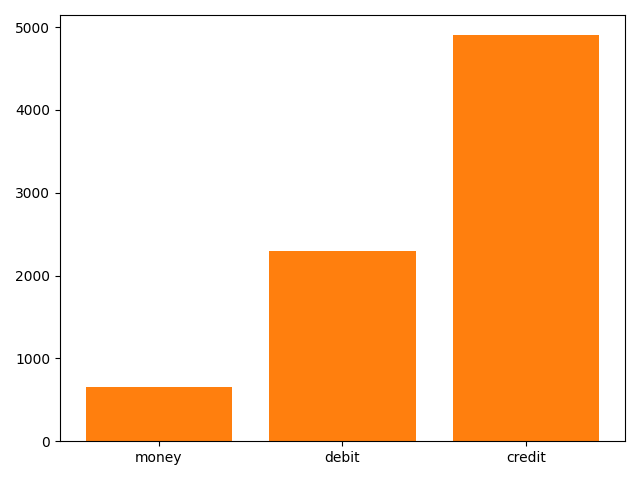
 